In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

In [3]:
#!pip install openpyxl

In [4]:
#!pip install threadpoolctl==3.1.0

In [5]:
# !pip install yellowbrick

In [6]:
data=pd.read_excel('customer.xlsx')

In [7]:
data.head(2)

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0


In [8]:
data1=data.iloc[:,1:4]

In [9]:
data1.head(2)

,Yearly_Income,Age,Cust_Spend_Score
0,15000,18,44
1,15000,18,79


In [10]:
data1=data1.set_index(data['Cust_Number'])

In [11]:
data1.head(2)

,Yearly_Income,Age,Cust_Spend_Score
Cust_Number,,,
CUSTID1,15000,18,44
CUSTID2,15000,18,79


In [12]:
data1.isnull().sum()

Yearly_Income       0
Age                 0
Cust_Spend_Score    0
dtype: int64

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data1_sc=sc.fit_transform(data1)
data1_sc=pd.DataFrame(data1_sc,columns=data1.columns,index=data1.index)

In [14]:
data1_sc.head(2)

,Yearly_Income,Age,Cust_Spend_Score
Cust_Number,,,
CUSTID1,-1.738999,-1.501068,-0.284181
CUSTID2,-1.738999,-1.501068,1.063563


In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [16]:
merg_single=linkage(data1_sc,method='single')
merg_complete=linkage(data1_sc,method='complete')
merg_avg=linkage(data1_sc,method='average')
merg_centroid = linkage(data1_sc, method='centroid')
merg_ward=linkage(data1_sc,method='ward')

In [17]:
pd.DataFrame(merg_single)

,0,1,2,3
0,114.0,115.0,0.000000,2.0
1,94.0,97.0,0.038507,2.0
2,157.0,161.0,0.054219,2.0
3,54.0,55.0,0.077014,2.0
4,76.0,85.0,0.080908,2.0
...,...,...,...,...
194,199.0,393.0,0.748961,195.0
195,2.0,394.0,0.786447,196.0
196,389.0,395.0,0.884405,198.0
197,198.0,396.0,0.996253,199.0


In [18]:
data1_sc.shape

(200, 3)

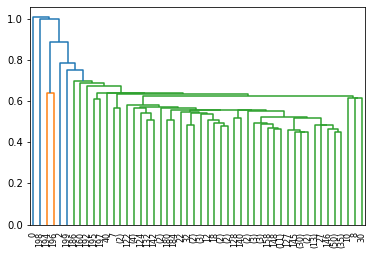

In [19]:
dendrogram(merg_single,truncate_mode='lastp',p=50)
plt.show()

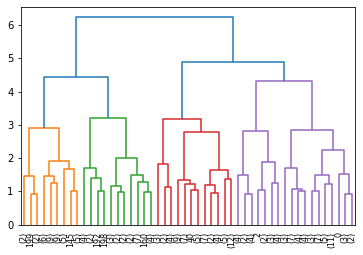

In [20]:
dendrogram(merg_complete,truncate_mode='lastp',p=50)
plt.show()

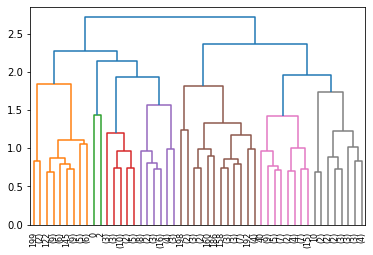

In [21]:
dendrogram(merg_avg,truncate_mode='lastp',p=50)
plt.show()

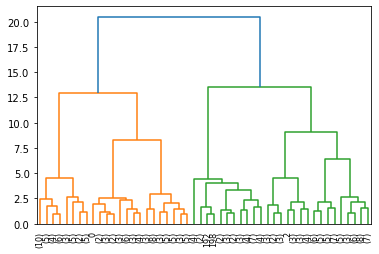

In [22]:
dendrogram(merg_ward,truncate_mode='lastp',p=50)
plt.show()

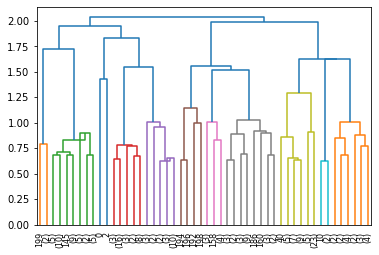

In [23]:
dendrogram(merg_centroid,truncate_mode='lastp',p=50)
plt.show()

In [24]:
from scipy.cluster.hierarchy import cophenet,linkage,dendrogram,fcluster
from scipy.spatial.distance import pdist 

In [25]:
link=['single','complete','centroid','average','ward']
for i in link:
    l=linkage(data1_sc,method=i)
    c,cop_dst=(cophenet(l,pdist(data1_sc)))
    print('The cophenet of ',i,'is : ',c)

The cophenet of  single is :  0.4976362567018477
The cophenet of  complete is :  0.5802671732995099
The cophenet of  centroid is :  0.6471874851072724
The cophenet of  average is :  0.6595977493519807
The cophenet of  ward is :  0.6384840439686307


In [26]:
for i in [5,7,8,9,10,11,12,13,14,15,17,19,20,21]:
    nclust=fcluster(merg_ward,i,criterion='distance')
    print('The number of cluster for the distance of ',i,' is ',len(np.unique(nclust)))

The number of cluster for the distance of  5  is  7
The number of cluster for the distance of  7  is  6
The number of cluster for the distance of  8  is  6
The number of cluster for the distance of  9  is  5
The number of cluster for the distance of  10  is  4
The number of cluster for the distance of  11  is  4
The number of cluster for the distance of  12  is  4
The number of cluster for the distance of  13  is  3
The number of cluster for the distance of  14  is  2
The number of cluster for the distance of  15  is  2
The number of cluster for the distance of  17  is  2
The number of cluster for the distance of  19  is  2
The number of cluster for the distance of  20  is  2
The number of cluster for the distance of  21  is  1


In [27]:
# from the distance 14 to 20, for the range of 6 units, the number of cluster is remained as 2 
# which is more than other clusters,
# Hence as per dendogram 2 can be the optimal number of cluster

In [28]:
lab=fcluster(merg_ward,9,criterion='distance')
# for a distance of 14, the hierarichal clustering is giving 2 clusters ( We can see that from the dendogram)

In [29]:
from sklearn.metrics import silhouette_score
silhouette_score(data1_sc,lab)

0.4090063627129395

In [30]:
lab=fcluster(merg_ward,9,criterion='distance')
silhouette_score(data1_sc,lab)

0.4090063627129395

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
agg_mod=AgglomerativeClustering(n_clusters=5,linkage='ward')
agg_mod.fit(data1_sc)
agg_lab=agg_mod.labels_

In [33]:
agg_lab

array([0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 3, 3, 0, 3, 1, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])